# Задача 1. Метод k ближайших соседей

In [138]:
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

Сгенерируем обучающую выборку из трех классов и построим разделяющие поверхности методом kNN при различных k.

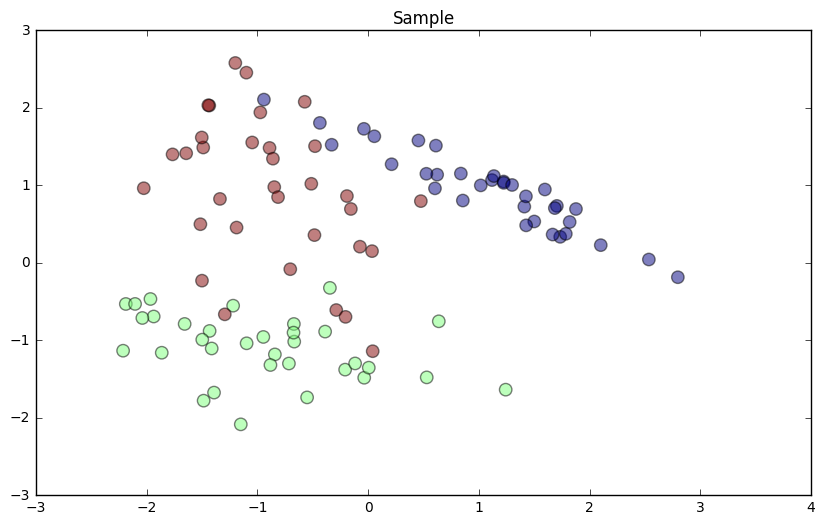

In [139]:
sample = skl.datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_repeated=0, n_redundant=0, 
                                          n_classes=3, n_clusters_per_class=1, random_state=40)
plt.figure(figsize=(10, 6))
plt.scatter(sample[0][:, 0], sample[0][:, 1], c=sample[1], alpha=0.5, s=80)
plt.title('Sample')
plt.show()

In [140]:
colors = ListedColormap(['red', 'blue', 'green'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightgreen'])
train_data, test_data, train_labels, test_labels = skl.model_selection.train_test_split(sample[0], sample[1], 
                                                                                        test_size=0.4, random_state = 1)
accuracy = np.array([])

In [141]:
def get_meshgrid(data, step=0.05, border=0.5):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border 
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [142]:
def plot_decision_surface(k, estimator, train_data, train_labels, test_data, test_labels, flag, colors=colors, 
                          light_colors=light_colors):
    estimator.fit(train_data, train_labels)
    if (flag):
        print("k = ", k)
        plt.figure(figsize=(16, 6))
        
        plt.subplot(1, 2, 1)
        xx, yy = get_meshgrid(train_data, 0.05, 2)
        predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
        plt.pcolormesh(xx, yy, predictions, cmap=light_colors)
        plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap=colors)
        plt.title('Train data, accuracy={:.2f}'.format(skl.metrics.accuracy_score(train_labels,estimator.predict(train_data))))

        plt.subplot(1, 2, 2)
        plt.pcolormesh(xx, yy, predictions, cmap=light_colors)
        plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap=colors)
        plt.title('Test data, accuracy={:.2f}'.format(skl.metrics.accuracy_score(test_labels, estimator.predict(test_data))))
        plt.show()
    return skl.metrics.accuracy_score(test_labels, estimator.predict(test_data))

k =  1


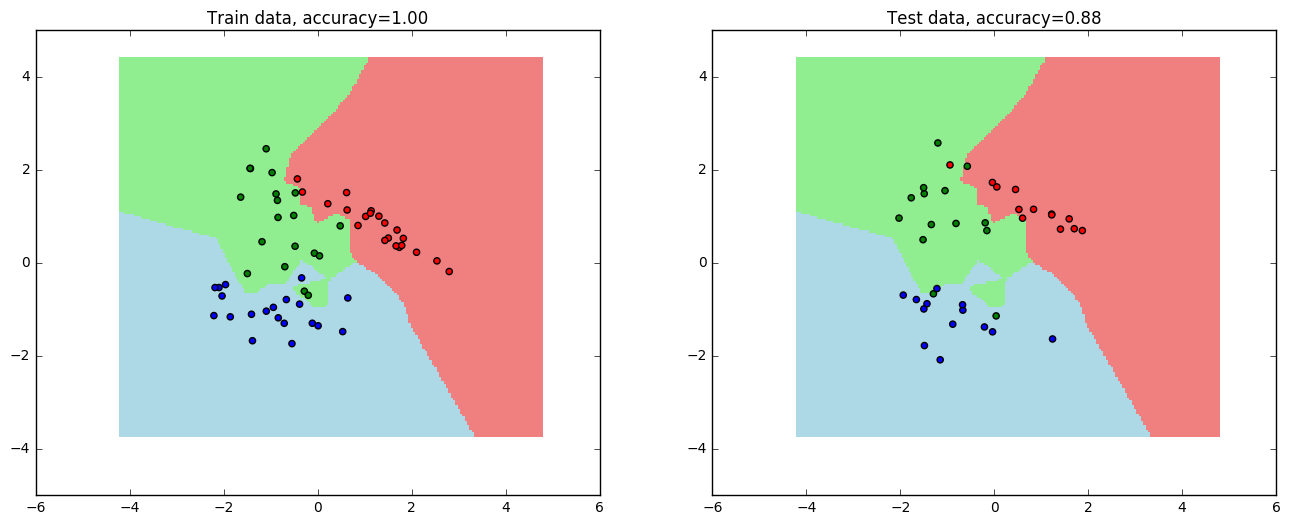

k =  2


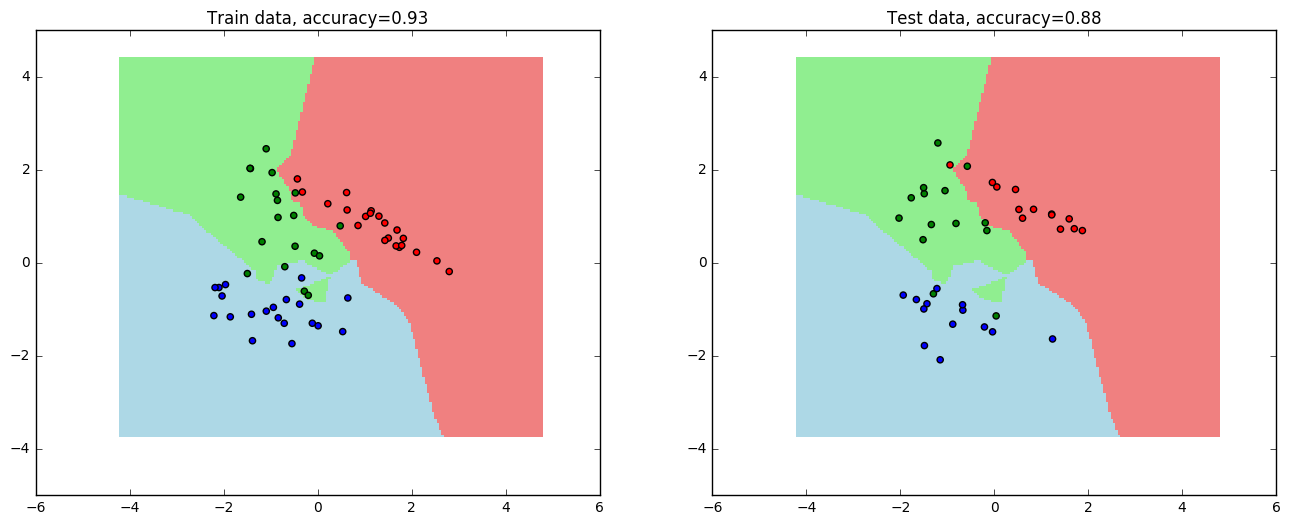

k =  3


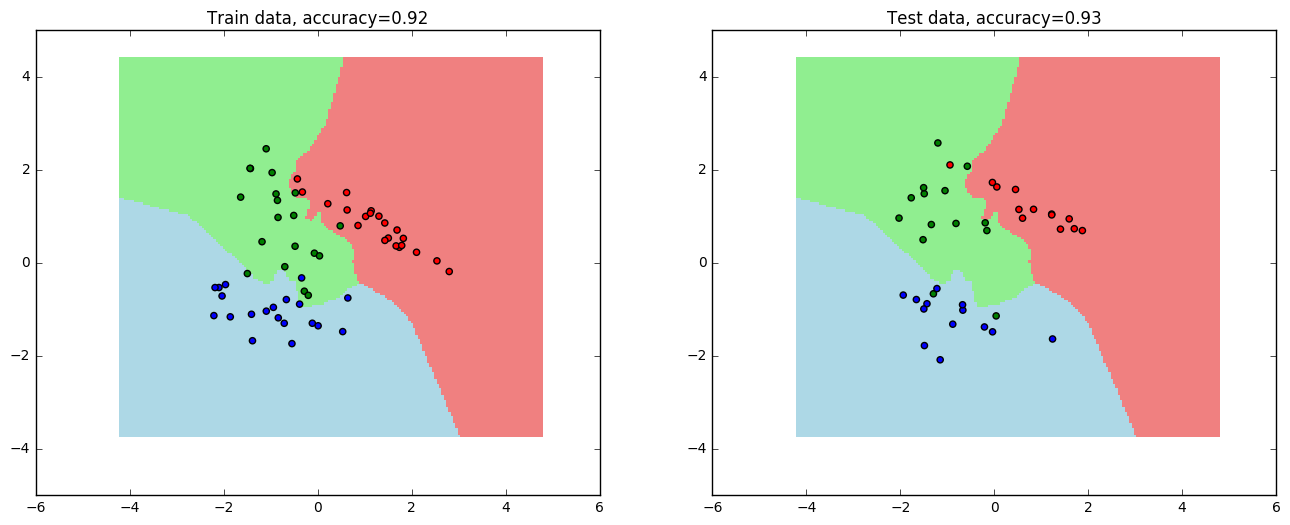

k =  4


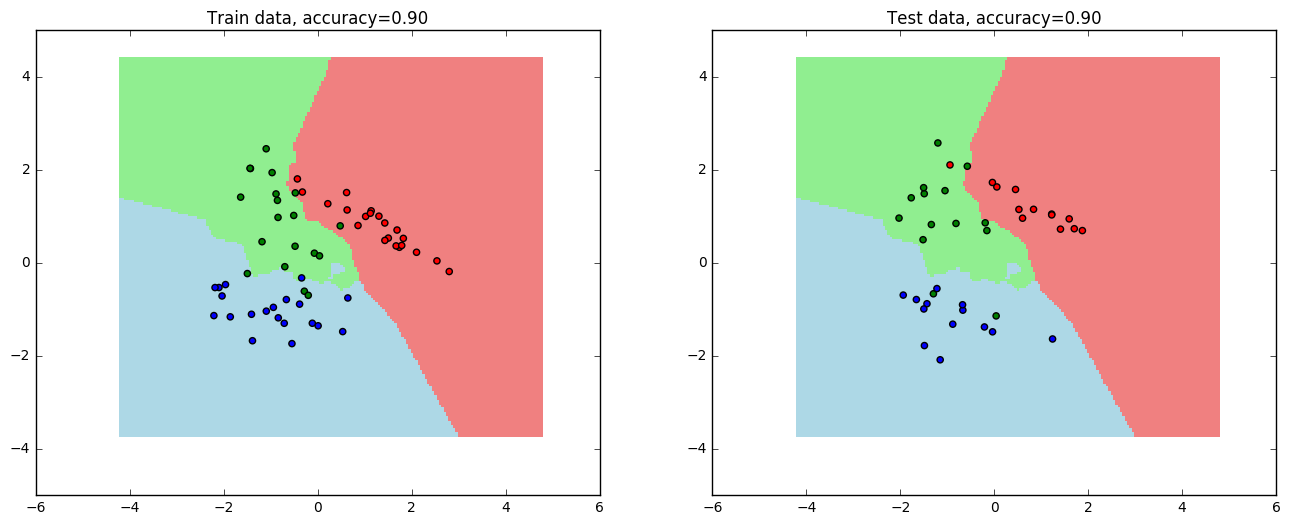

k =  10


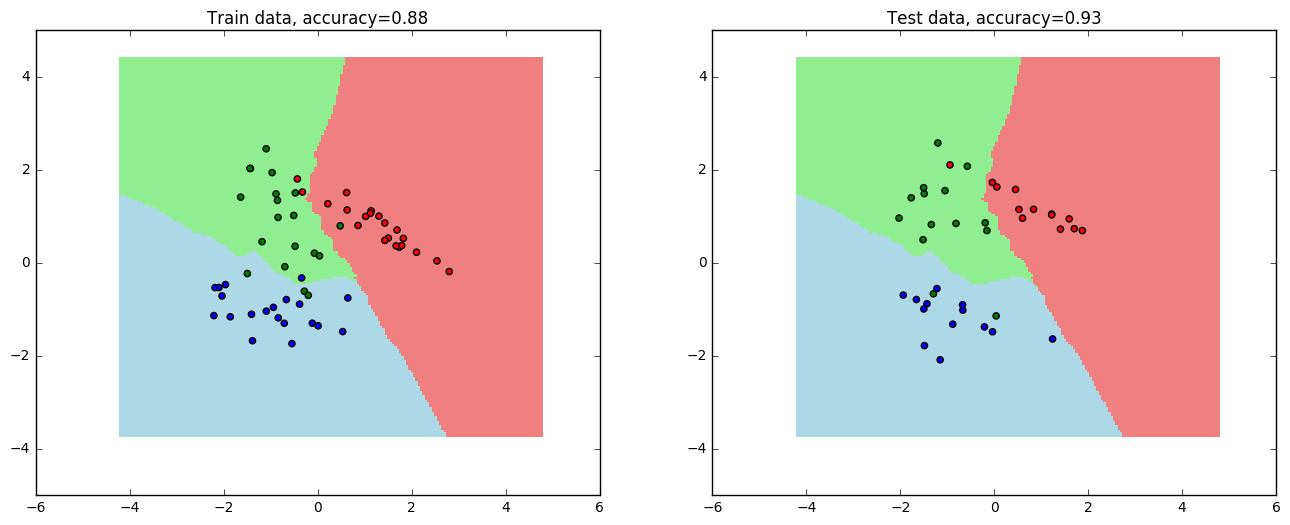

k =  20


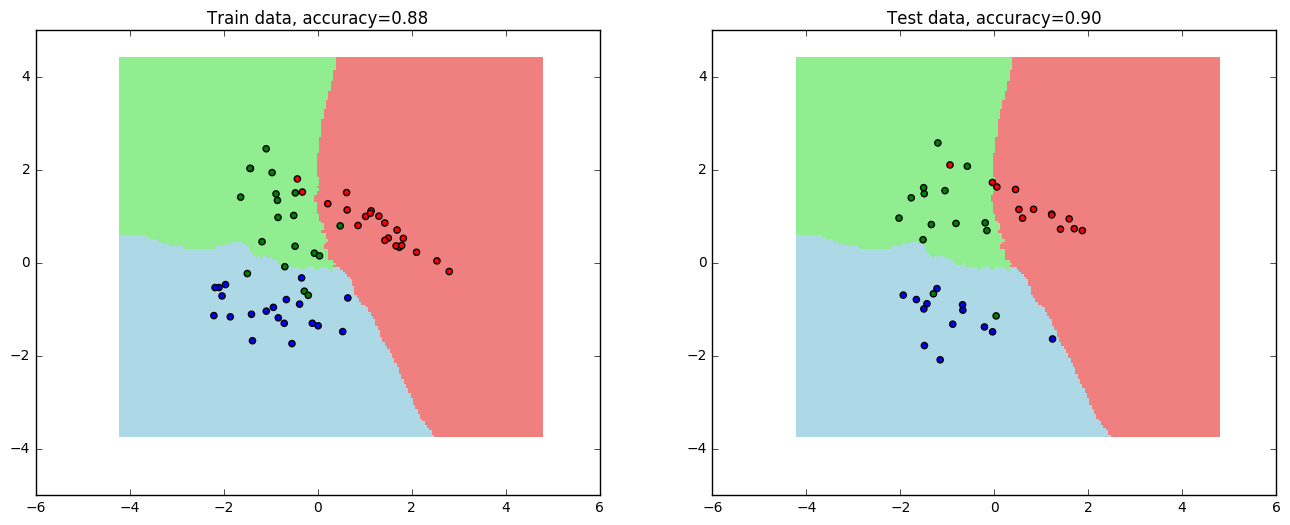

k =  30


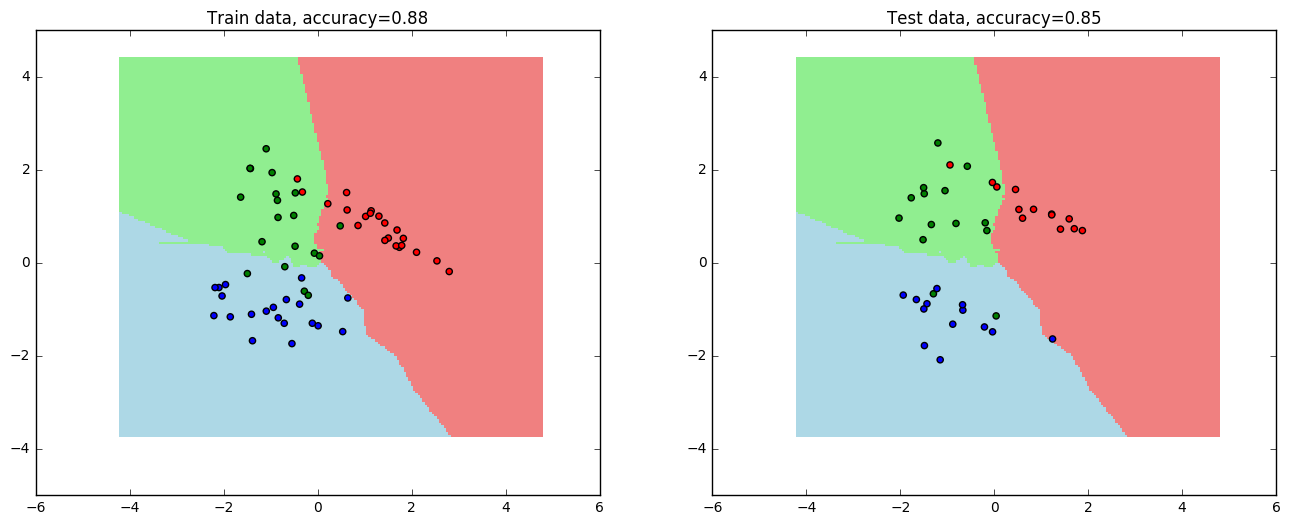

k =  40


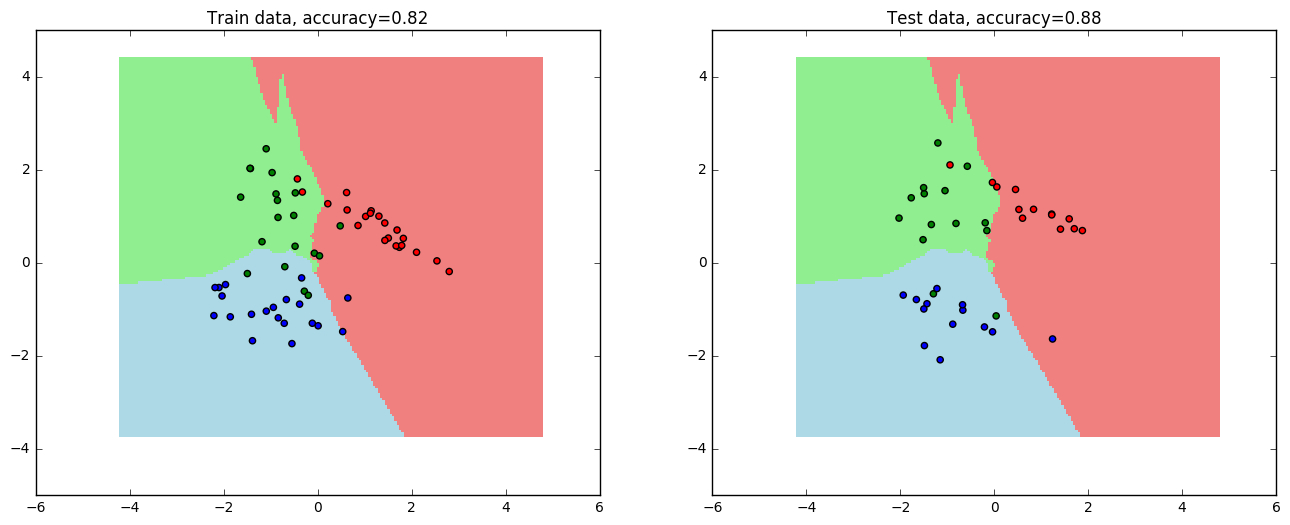

k =  50


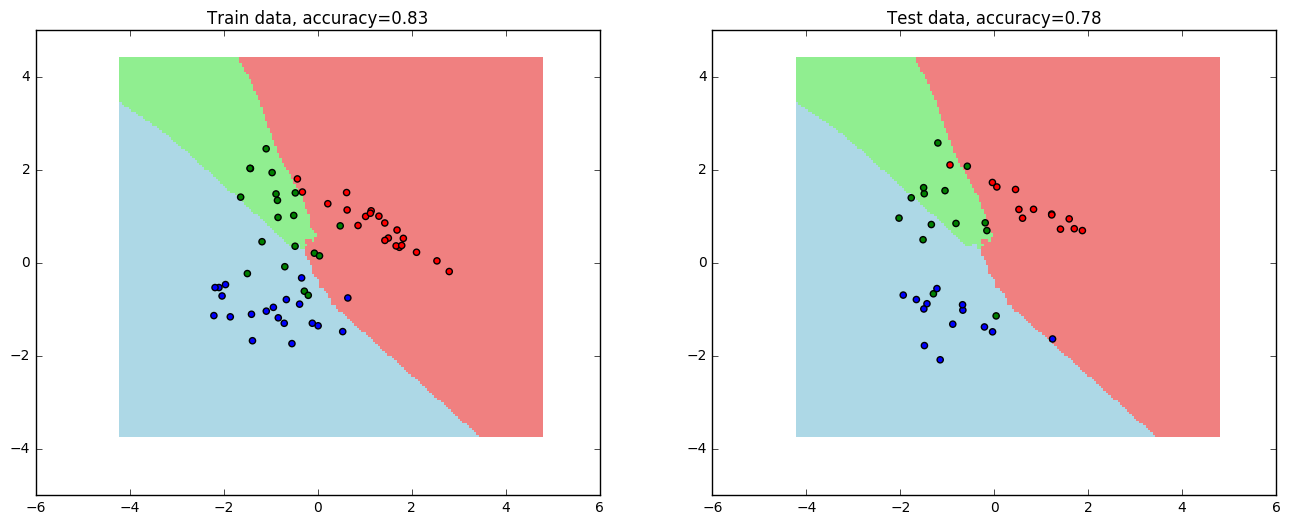

In [143]:
k = np.arange(1, 51)
for i in k:
    flag = 0
    if (i < 5 or i % 10 == 0):
        flag = 1
    estimator = skl.neighbors.KNeighborsClassifier(n_neighbors=i)
    accuracy = np.append(accuracy, plot_decision_surface(i, estimator, train_data, train_labels, test_data, test_labels, flag))

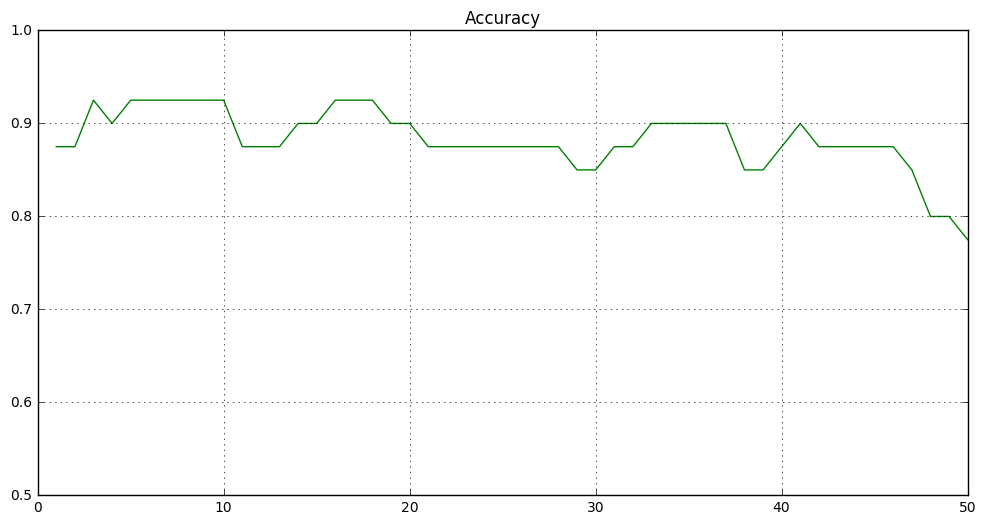

In [148]:
plt.figure(figsize=(12, 6))
plt.plot(k, accuracy, color='green')
plt.ylim([0.5, 1])
plt.grid()
plt.title('Accuracy')
plt.show()

Из графика зависимости accuracy от k видно, что оптимальное значение k ~ 5-10. При увеличении k accuracy уменьшается.